# 水稻產量與糧食浪費的相關性
FAOSTAT數據資料分析

plan:
1. 取得資料
2. 匯入資料
3. 取出歷年水稻產量的資料，歷年糧食浪費量
4. 相關性（迴歸分析）


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

從FAOSTAT下載資料導入

http://www.fao.org/faostat/en/#definitions

In [27]:
df1 = pd.read_csv("FAOSTAT_data_4-11-2019-2.csv")
df2 = pd.read_csv("FAOSTAT_data_4-11-2019-3.csv")

In [28]:
x = df1["Value"]
xtime = df1["Year"]

In [29]:
fliter = (df2["Element"] == "Yield")

In [30]:
df2 = df2[fliter]
y = df2["Value"]
ytime = df2["Year"]

##  偷看一下時間序列與資料的關係

Text(0.5, 0, 'year')

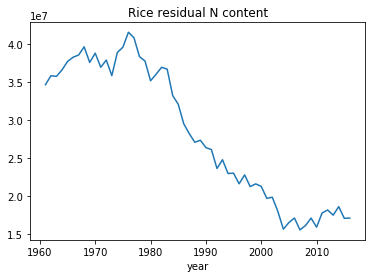

In [197]:
plt.plot(xtime,x)
plt.title("Rice residual N content")
plt.xlabel("year")

Text(0.5, 0, 'year')

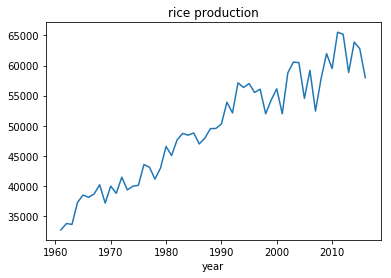

In [198]:
plt.plot(ytime,y)
plt.title("Rice production")
plt.xlabel("year")

# 線性迴歸分析

In [70]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [71]:
x1 =np.array(x, dtype = np.int64)
y1 =np.array(y, dtype = np.int64)

In [72]:
# Important! 將資料轉為 [1,n] 的 array
x1 = x1.reshape(-1,1)
y1 = y1.reshape(-1,1)

In [74]:
lm.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
rline = regr.predict(x1)

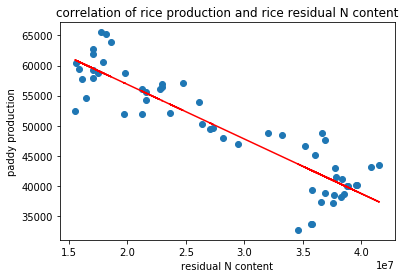

In [109]:
plt.scatter(x1, y1)
plt.title("correlation of rice production and rice residual N content")
plt.xlabel("residual N content")
plt.ylabel("paddy production")
plt.plot(x,rline,"r")

計算均方以及相關係數

In [88]:
mse = np.mean((y_pred - y1)**2)

In [90]:
r_square = lm.score(x1,y1)

In [94]:
print("均方")
print(mse)
print("相關係數")
print(r_square)

均方
15982886.601941125
相關係數
0.8015687220726465


# 預測練習～

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train,x_test,y_train,y_test = train_test_split(x1 ,y1,test_size = 0.3, random_state = 9487 )

In [189]:
lm.fit(x_train,y_train)
y_pred = regr.predict(x_train)

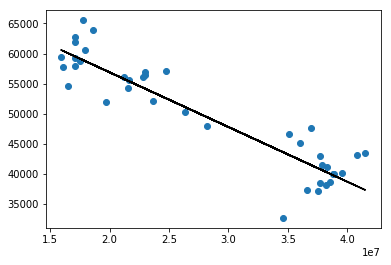

In [190]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred, "k")

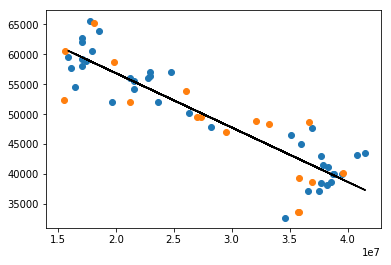

In [193]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred, "k")
plt.scatter(x_test,y_test)